In [ ]:
!pip install spacy sentence_transformers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import string
import json

import spacy
from spacy.tokens import Doc
from sentence_transformers import SentenceTransformer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm

import pickle

# from sklearn.model_selection import ValidationCurveDisplay,validation_curve

try:
    nlp = spacy.load("en_core_web_md")
except:
    spacy.cli.download("en_core_web_md")
    nlp = spacy.load("en_core_web_md")

llm = SentenceTransformer("all-MiniLM-L6-v2")

In [ ]:
from google.colab import drive

drive.mount("/content/drive/")
data_path = '/content/drive/MyDrive/Homeworks/7630 Web Intelligence/WI group project/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Read JSON file line by line
data = []
with open(data_path + 'News_Category_Dataset_v3.json', 'r') as file:
    for line in file:
        data.append(json.loads(line))

# Convert the list of dictionaries to a DataFrame
dataframe = pd.DataFrame(data)

# Print the DataFrame
dataframe

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


## Remove empty line in the dataset

In [ ]:
#show the empty lines in the [headline] column
dataframe.loc[dataframe["headline"] == ""]

,link,headline,category,short_description,authors,date
90944,https://www.huffingtonpost.com/entry/lincoln-2...,,POLITICS,,"Robert Moran, ContributorRobert Moran leads Br...",2015-08-22
95567,https://www.huffingtonpost.com/entry/post_9671...,,RELIGION,Let everyone not wrapped in tired and disprove...,"Matthew Fox, ContributorRadical theologian Mat...",2015-06-30
103675,https://www.huffingtonpost.com/entry/us-and-eu...,,WORLDPOST,,"Natasha Srdoc, ContributorAuthor, Economist, C...",2015-03-29
109100,https://www.huffingtonpost.com/entry/disney-ce...,,BUSINESS,,"Gary Snyder, ContributorWriter and Media Strat...",2015-01-25
110153,https://www.huffingtonpost.com/entry/beverly-h...,,MEDIA,,"Gary Snyder, ContributorWriter and Media Strat...",2015-01-13
122145,https://www.huffingtonpost.com/entry/beverly-h...,,QUEER VOICES,,"Gary Snyder, ContributorWriter and Media Strat...",2014-08-28


In [ ]:
#show the empty lines in the [short_description] column
dataframe.loc[dataframe["short_description"] == "",]

,link,headline,category,short_description,authors,date
20773,https://www.huffingtonpost.com/entry/the-big-b...,The Big Blue Wave,COMEDY,,"Shan Wells, ContributorSciency sun venerator +...",2017-11-10
21523,https://www.huffingtonpost.com/entry/inside-ru...,"Inside Rukban Camp, One Of Syria’s Most Desper...",WORLD NEWS,,"Yasser Allawi, Syria Deeply",2017-10-31
22793,https://www.huffingtonpost.com/entry/syrian-re...,Syrian Refugees Return From Lebanon Only To Fl...,WORLD NEWS,,"Abby Sewell, Refugees Deeply",2017-10-14
32223,https://www.huffingtonpost.com/entry/your-guid...,Your Guide To The Best BBQ In St. Louis Accord...,TASTE,,,2017-06-19
34488,https://www.huffingtonpost.com/entry/the-bechd...,The Bechdel Test,COMEDY,,"Hilary Fitzgerald Campbell, ContributorHilary'...",2017-05-24
...,...,...,...,...,...,...
206924,https://www.huffingtonpost.com/entry/true-lgbt...,True LGBTQ Stories: When A College Football Te...,QUEER VOICES,,"Nathan Manske, Contributor\nExecutive Director...",2012-02-25
206939,https://www.huffingtonpost.com/entry/chasing-i...,'Chasing Ice' -- The Climate Change Debate Is ...,ENVIRONMENT,,"Greg Reitman, Contributor\nFounder of Blue Wat...",2012-02-25
208803,https://www.huffingtonpost.com/entry/love-is-l...,Practice for International Kissing Day: 'Love ...,IMPACT,,"Karen Dalton-Beninato, Contributor\nWriter Nea...",2012-02-05
208865,https://www.huffingtonpost.com/entry/zach-hust...,"Zach Huston, Victim of Brutal Ohio School Bull...",QUEER VOICES,,"Ian Thompson, Contributor\nLegislative Represe...",2012-02-04


In [ ]:
#Function to remove empty row
def removeEmptyLine(df,col_name):
    df.replace("", pd.NA, inplace = True)
    df.dropna(subset=[col_name], inplace=True)
    return df

In [ ]:
dataframe = removeEmptyLine(dataframe,"headline")
dataframe = removeEmptyLine(dataframe,"short_description")

In [ ]:
#Verify that empty line was remove successfully
print((dataframe["headline"] == "").sum())
print((dataframe["short_description"] == "").sum())

0
0


In [ ]:
dataframe.describe()

,link,headline,category,short_description,authors,date
count,189814,189814,189814,189814,156859,189814
unique,189773,188417,42,187020,28312,3890
top,https://www.huffingtonpost.comhttp://www.mothe...,Sunday Roundup,POLITICS,Welcome to the HuffPost Rise Morning Newsbrief...,Lee Moran,2017-03-27
freq,2,90,32441,192,2954,100


## Get only the categories with more than 4000 news

In [ ]:
#get the category with number of news more than 4000
count_df = pd.DataFrame(dataframe.groupby(["category"]).count()["headline"].sort_values(ascending=False),columns=["headline"])
category_list = count_df.loc[count_df["headline"] >= 4000].index.to_list()
category_list

['POLITICS',
 'WELLNESS',
 'ENTERTAINMENT',
 'STYLE & BEAUTY',
 'TRAVEL',
 'PARENTING',
 'FOOD & DRINK',
 'QUEER VOICES',
 'HEALTHY LIVING',
 'BUSINESS',
 'COMEDY',
 'SPORTS',
 'HOME & LIVING',
 'BLACK VOICES']

## To make classification, we will just use 1000 news per category

In [ ]:
my_list = []
for cat in category_list:
    my_list.append(dataframe.loc[dataframe["category"] == cat,['headline','category','short_description']].head(1000))
df = pd.concat(my_list, ignore_index=True)
df["full_new"] = df["headline"] +' '+ df["short_description"]
df

,headline,category,short_description,full_new
0,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,Biden Says U.S. Forces Would Defend Taiwan If ...
1,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,‘Beautiful And Sad At The Same Time’: Ukrainia...
2,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...",Biden Says Queen's Death Left 'Giant Hole' For...
3,Bill To Help Afghans Who Escaped Taliban Faces...,POLITICS,Republican outrage over the shoddy U.S. withdr...,Bill To Help Afghans Who Escaped Taliban Faces...
4,Mark Meadows Complies With Justice Dept. Subpo...,POLITICS,The former White House chief of staff has turn...,Mark Meadows Complies With Justice Dept. Subpo...
...,...,...,...,...
13995,Timid Reporting On Racism Skews Our Political ...,BLACK VOICES,The truth behind “economic populism” and “iden...,Timid Reporting On Racism Skews Our Political ...
13996,"'Everything, Everything' Answers Calls For Mor...",BLACK VOICES,"Even in 2017, the market for films with women ...","'Everything, Everything' Answers Calls For Mor..."
13997,New Orleans Principal Fired After Video Captur...,BLACK VOICES,He was already being investigated after photos...,New Orleans Principal Fired After Video Captur...
13998,How Moonlight Muted Me,BLACK VOICES,I saw Moonlight for the first time at the begi...,How Moonlight Muted Me I saw Moonlight for the...


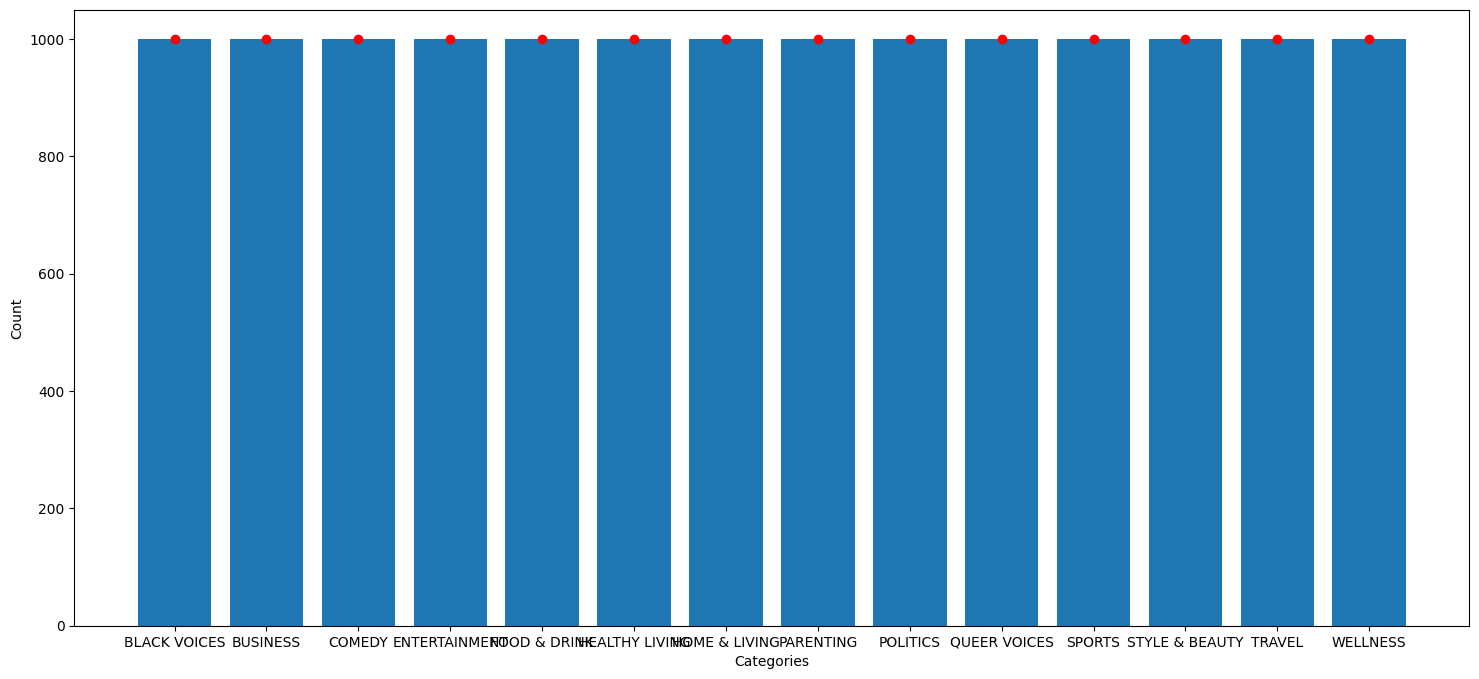

In [ ]:
count_df = pd.DataFrame(df.groupby(["category"]).count()["full_new"].sort_values(ascending=False))

plt.figure(figsize=(18,8))
plt.xlabel("Categories")
plt.ylabel("Count")
plt.bar(count_df.index,count_df["full_new"])
plt.plot(count_df.index,count_df["full_new"],'ro')

In [ ]:
def removeEmptyRow(df,col_name):
    df.replace([" ","","_","__"], pd.NA, inplace = True)
    df.dropna(subset=[col_name], inplace=True)
    return df

In [ ]:
df = removeEmptyRow(df,"full_new")
print(len(df))
df.head()

14000


,headline,category,short_description,full_new
0,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,Biden Says U.S. Forces Would Defend Taiwan If ...
1,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,‘Beautiful And Sad At The Same Time’: Ukrainia...
2,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...",Biden Says Queen's Death Left 'Giant Hole' For...
3,Bill To Help Afghans Who Escaped Taliban Faces...,POLITICS,Republican outrage over the shoddy U.S. withdr...,Bill To Help Afghans Who Escaped Taliban Faces...
4,Mark Meadows Complies With Justice Dept. Subpo...,POLITICS,The former White House chief of staff has turn...,Mark Meadows Complies With Justice Dept. Subpo...


In [ ]:
df.iloc[6].short_description

'"Cancer does not discriminate red and blue," the president said Monday. "Beating cancer is something we can do together."'

## Text preprocessing

Split the document into sentences then use sentence transformer for vectorizing

In [ ]:
category_to_index = {x: y for y, x in enumerate(category_list)}


def vectorize(row):
    text = row.headline
    if row.short_description:
        text += f'. {row.short_description}'

    # split into sents
    sents = list(filter(lambda x: len(x) > 1, nlp(text).sents))

    # features
    vectors = llm.encode(sents)
    vectors[0] *= 2  # double weight for title
    vector = vectors.sum(0)
    vector /= np.linalg.norm(vector)  # normalization

    # label
    label = category_to_index[row.category]

    return vector, label


In [ ]:
features, labels = zip(*(vectorize(row[1]) for row in df.iterrows()))
print(len(labels))

14000


### Down sample for efficiency

In [ ]:
import random

# downsamples
features = np.asarray(features)
labels = np.asarray(labels)
index = list(range(len(labels)))
index = random.sample(index, 6000)

features = features[index]
labels = labels[index]

### Split into training and test set




In [ ]:
# training and test splitting

index = list(range(len(labels)))
random.shuffle(index)
cutting_point = int(len(index) * 0.7)

index_training = index[: cutting_point]
index_test = index[cutting_point: ]


training_set = features[index_training], labels[index_training]
test_set = features[index_test], labels[index_test]

len(index_training), len(index_test)

(4200, 1800)

### Visualization


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt


def draw_features(features, labels):
    pca2 = Pipeline([
        #('stand', StandardScaler()),
        ('pca', PCA(2)),
    ])

    feat_2 = pca2.fit_transform(features)

    for lab in np.unique(labels):
        index = lab == labels
        feat = feat_2[index]
        cate = category_list[lab]
        plt.scatter(*feat.T, alpha=0.5, label=cate)

    plt.legend()
    plt.title("scatter - sentence embeddings")
    plt.show()

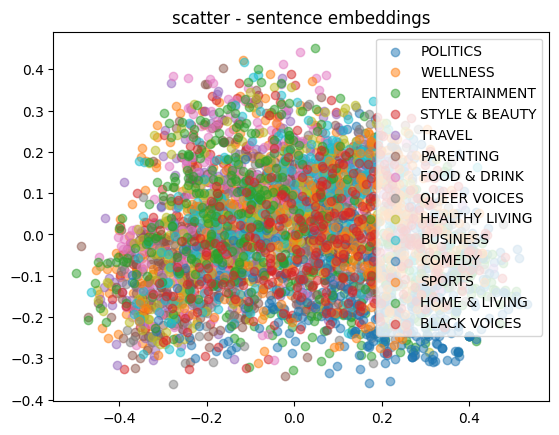

In [ ]:
draw_features(*training_set)

## Various Classification Models

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pca100 = Pipeline([
    ('stand', StandardScaler()),
    ('pca', PCA(100)),
])


feat100 = pca100.fit_transform(training_set[0])
test100 = pca100.transform(test_set[0])

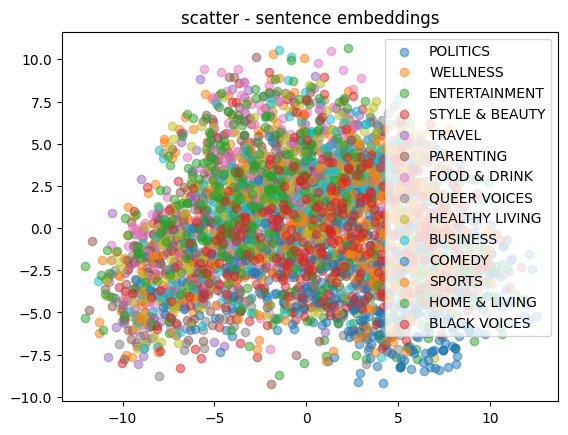

In [ ]:
draw_features(feat100, training_set[1])

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=30)
gmm.fit(feat100)
gmm_labels = gmm.predict(feat100)

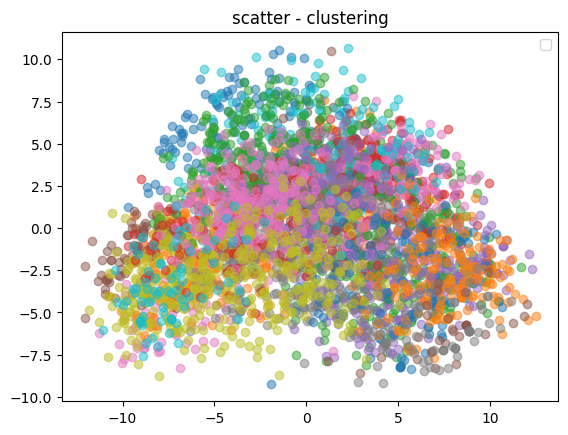

In [ ]:
pca2 = Pipeline([
    #('stand', StandardScaler()),
    ('pca', PCA(2)),
])

feat_2 = pca2.fit_transform(feat100)

for lab in np.unique(gmm_labels):
    index = lab == gmm_labels
    feat = feat_2[index]
    plt.scatter(*feat.T, alpha=0.5)

plt.legend()
plt.title("scatter - clustering")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


NAME_FUNC = [('acc', accuracy_score), ('recall', recall_score),
             ('precision', precision_score), ('f1', f1_score)]


def evaluate(model, test_feats, test_labels=test_set[1]):
    pred = model.predict(test_feats)
    result = {}
    for name, func in NAME_FUNC:
        if name == 'acc':
            result[name] = func(test_labels, pred)
        else:
            result[name] = func(test_labels, pred, average='micro')
    return result

### Logistic Reg

In [ ]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(max_iter=500).fit(feat100, training_set[1])
evaluate(lr, test100)

{'acc': 0.42, 'recall': 0.42, 'precision': 0.42, 'f1': 0.41999999999999993}

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier().fit(feat100, training_set[1])
evaluate(rf, test100)

{'acc': 0.3844444444444444,
 'recall': 0.3844444444444444,
 'precision': 0.3844444444444444,
 'f1': 0.38444444444444437}

### SVM

In [ ]:
from sklearn.svm import SVC


svm = SVC().fit(feat100, training_set[1])
evaluate(svm, test100)

{'acc': 0.44722222222222224,
 'recall': 0.44722222222222224,
 'precision': 0.44722222222222224,
 'f1': 0.4472222222222222}

In [ ]:
# save the model
with open(data_path + 'prep.pkl', 'wb') as f:
    pickle.dump(pca100, f)

with open(data_path + 'clf.pkl', 'wb') as f:
    pickle.dump(svm, f)

### Parameters Searching

In [ ]:
gs_lr = GridSearchCV(
    LogisticRegression(),
    param_grid={
        'C': [0.1, 0.5, 1, 2],
        "max_iter": [500],
    },
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)
gs_lr.fit(feat100, training_set[1])
print(gs_lr.best_score_)
print(gs_lr.best_params_)
evaluate(gs_lr.best_estimator_, test100)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


0.4026190476190476
{'C': 0.1, 'max_iter': 500}


{'acc': 0.41833333333333333,
 'recall': 0.41833333333333333,
 'precision': 0.41833333333333333,
 'f1': 0.41833333333333333}

In [ ]:
gs_svc = GridSearchCV(
    SVC(),
    param_grid={
        'C': [0.1, 0.5, 1, 2],
        "kernel": ['rbf', 'sigmoid'],
        "gamma": ["scale", "auto"],
    },
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)
gs_svc.fit(feat100, training_set[1])
print(gs_svc.best_score_)
print(gs_svc.best_params_)
evaluate(gs_svc.best_estimator_, test100)

0.43357142857142855
{'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}


{'acc': 0.45611111111111113,
 'recall': 0.45611111111111113,
 'precision': 0.45611111111111113,
 'f1': 0.45611111111111113}

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=[10, 10], max_iter=500).fit(feat100, training_set[1])
print('training')
print(evaluate(mlp, feat100, training_set[1]))
print()
print('testing')
print(evaluate(mlp, test100))

training
{'acc': 0.4845238095238095, 'recall': 0.4845238095238095, 'precision': 0.4845238095238095, 'f1': 0.4845238095238095}

testing
{'acc': 0.35388888888888886, 'recall': 0.35388888888888886, 'precision': 0.35388888888888886, 'f1': 0.35388888888888886}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.neural_network import MLPClassifier


class EnsembledModel:

    def __init__(self):
        self.gmm = GaussianMixture(n_components=30)
        self.rf = RandomForestClassifier(max_depth=5, min_samples_split=30)
        self.lr = LogisticRegression(C=2, max_iter=500)
        self.svc = SVC(C=1, gamma='scale', kernel='rbf', probability=True)
        self.clf = MLPClassifier(hidden_layer_sizes=[10], max_iter=500)

    def fit(self, X, y):
        self.lr.fit(X, y)
        self.svc.fit(X, y)

        self.gmm.fit(X)
        # X_gmm = np.c_[gmm.predict(X).reshape(-1, 1), X]
        # self.rf.fit(X_gmm, y)

        X_prob = np.c_[
            self.lr.predict_proba(X),
            self.svc.predict_proba(X),
            # self.rf.predict_proba(X_gmm),
        ]

        self.clf.fit(X_prob, y)
        return self

    def predict(self, X):
        # X_gmm = np.c_[gmm.predict(X).reshape(-1, 1), X]
        X_prob = np.c_[
            self.lr.predict_proba(X),
            self.svc.predict_proba(X),
            # self.rf.predict_proba(X_gmm),
        ]

        y = self.clf.predict(X_prob)
        return y


In [ ]:
model = EnsembledModel().fit(feat100, training_set[1])
evaluate(model, test100)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


{'acc': 0.4066666666666667,
 'recall': 0.4066666666666667,
 'precision': 0.4066666666666667,
 'f1': 0.4066666666666667}

## Label Filtering

Filter out the noisy labels by GMM first.

cluster 10 {'COMEDY': 0.9354838709677419, 'ENTERTAINMENT': 0.06451612903225806}
cluster 13 {'SPORTS': 0.7542372881355932, 'QUEER VOICES': 0.07627118644067797}
cluster 16 {'COMEDY': 0.8727272727272727, 'ENTERTAINMENT': 0.12727272727272726}
cluster 20 {'POLITICS': 0.7407407407407407, 'QUEER VOICES': 0.08333333333333333}
cluster 23 {'COMEDY': 0.6571428571428571, 'ENTERTAINMENT': 0.2571428571428571}
cluster 24 {'COMEDY': 0.6521739130434783, 'ENTERTAINMENT': 0.2608695652173913}
cluster 25 {'TRAVEL': 0.453125, 'BUSINESS': 0.390625}
{'POLITICS', 'SPORTS', 'COMEDY'}


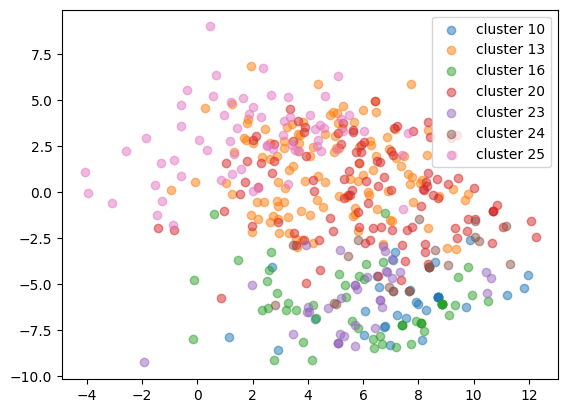

In [ ]:
gmm = GaussianMixture(n_components=30)
gmm.fit(feat100)
gmm_labels = gmm.predict(feat100)
feat_2 = pca2.fit_transform(feat100)

# visualization
n = 2
fig, ax = plt.subplots()
significant_categories = set()
for lab in np.unique(gmm_labels):
    index = lab == gmm_labels
    count_total = index.sum()
    cates, counts =  np.unique(training_set[1][index], return_counts=True)
    percents = counts / count_total
    cates, percents = zip(*sorted(zip([category_list[int(c)] for c in cates], percents), key=lambda x: -x[1]))
    if sum(percents[:n]) < 0.8:
        continue
    ax.scatter(*feat_2[index].T, alpha=0.5, label=f'cluster {lab}')
    print('cluster', lab, dict(zip(cates[:n], percents[:n])))
    significant_categories |= set([cates[i] for i in range(len(percents)) if percents[i] > 0.5])
ax.legend()
print(significant_categories)

In [ ]:
# adjust labels
significant_categories = ['POLITICS', 'SPORTS', 'COMEDY']

def adjust_category(x):
    try:
        return significant_categories.index(x) + 1
    except ValueError:
        return 0

df['label'] = df.category.apply(adjust_category)
df

,headline,category,short_description,full_new,label
0,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,Biden Says U.S. Forces Would Defend Taiwan If ...,1
1,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,‘Beautiful And Sad At The Same Time’: Ukrainia...,1
2,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...",Biden Says Queen's Death Left 'Giant Hole' For...,1
3,Bill To Help Afghans Who Escaped Taliban Faces...,POLITICS,Republican outrage over the shoddy U.S. withdr...,Bill To Help Afghans Who Escaped Taliban Faces...,1
4,Mark Meadows Complies With Justice Dept. Subpo...,POLITICS,The former White House chief of staff has turn...,Mark Meadows Complies With Justice Dept. Subpo...,1
...,...,...,...,...,...
13995,Timid Reporting On Racism Skews Our Political ...,BLACK VOICES,The truth behind “economic populism” and “iden...,Timid Reporting On Racism Skews Our Political ...,0
13996,"'Everything, Everything' Answers Calls For Mor...",BLACK VOICES,"Even in 2017, the market for films with women ...","'Everything, Everything' Answers Calls For Mor...",0
13997,New Orleans Principal Fired After Video Captur...,BLACK VOICES,He was already being investigated after photos...,New Orleans Principal Fired After Video Captur...,0
13998,How Moonlight Muted Me,BLACK VOICES,I saw Moonlight for the first time at the begi...,How Moonlight Muted Me I saw Moonlight for the...,0


In [ ]:
def vectorize(row):
    row = row[1]
    text = row.headline
    if row.short_description:
        text += f'. {row.short_description}'

    # split into sents
    sents = list(filter(lambda x: len(x) > 1, nlp(text).sents))

    # features
    vectors = llm.encode(sents)
    vectors[0] *= 2  # double weight for title
    vector = vectors.sum(0)
    vector /= np.linalg.norm(vector)  # normalization

    return vector


In [ ]:
df_cates = df[df.label > 0]
df_nocate = df[df.label == 0]
print(len(df_cates))

3000


<BarContainer object of 3 artists>

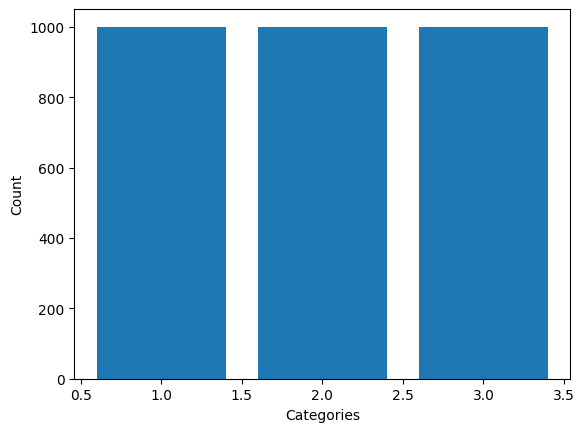

In [ ]:
count_df = df_cates.groupby(["label"])['label'].count()
plt.xlabel("Categories")
plt.ylabel("Count")
plt.bar(count_df.index, count_df)

In [ ]:
%time features = list(map(vectorize, df_cates.iterrows()))
labels = df_cates.label.values
print(len(features), len(labels))

CPU times: user 2min 3s, sys: 932 ms, total: 2min 4s
Wall time: 2min 7s
3000 3000


In [ ]:
%time features_no = list(map(vectorize, df_nocate.sample(500).iterrows()))
labels_no = np.zeros(len(features_no))  # 0 means Unknown category

features = np.concatenate([features, features_no])
labels = np.concatenate([labels, labels_no])

CPU times: user 21.7 s, sys: 165 ms, total: 21.8 s
Wall time: 22.1 s


In [ ]:
# training and test splitting

index = list(range(len(labels)))
random.shuffle(index)
cutting_point = int(len(index) * 0.7)

index_training = index[: cutting_point]
index_test = index[cutting_point: ]


training_set = features[index_training], labels[index_training]
test_set = features[index_test], labels[index_test]

len(index_training), len(index_test)

(2450, 1050)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pca100 = Pipeline([
    ('stand', StandardScaler()),
    ('pca', PCA(100)),
])


feat100 = pca100.fit_transform(training_set[0])
test100 = pca100.transform(test_set[0])

## Classification After Label Filtering

In [ ]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(max_iter=500).fit(feat100, training_set[1])
evaluate(lr, test100, test_set[1])

{'acc': 0.7333333333333333,
 'recall': 0.7333333333333333,
 'precision': 0.7333333333333333,
 'f1': 0.7333333333333333}

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier().fit(feat100, training_set[1])
evaluate(rf, test100, test_set[1])

{'acc': 0.7409523809523809,
 'recall': 0.7409523809523809,
 'precision': 0.7409523809523809,
 'f1': 0.7409523809523809}

In [ ]:
from sklearn.svm import SVC


svc = SVC().fit(feat100, training_set[1])
evaluate(svc, test100, test_set[1])

{'acc': 0.7685714285714286,
 'recall': 0.7685714285714286,
 'precision': 0.7685714285714286,
 'f1': 0.7685714285714286}

In [ ]:
# save the model
with open(data_path + 'prep.pkl', 'wb') as f:
    pickle.dump(pca100, f)

with open(data_path + 'clf.pkl', 'wb') as f:
    pickle.dump(svc, f)

In [ ]:
preds = svc.predict(test100)

Text(0.5, 1.0, 'Category - Precision')

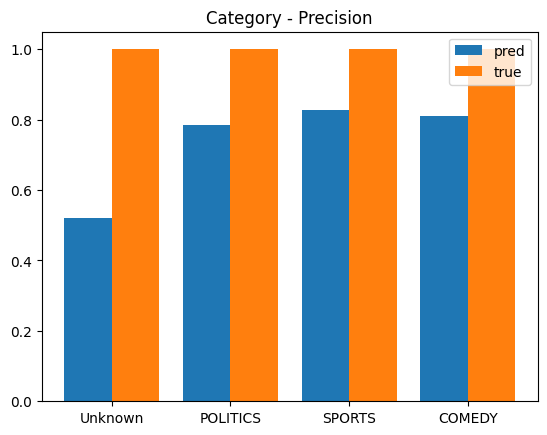

In [ ]:
acc = preds == test_set[1]

xaxis, ytotal = np.unique(test_set[1], return_counts=True)
ypred = [acc[test_set[1] == i].sum() for i in xaxis]

plt.bar(xaxis - 0.2, ypred / ytotal, 0.4, label = 'pred')
plt.bar(xaxis + 0.2, ytotal / ytotal, 0.4, label = 'true')
plt.xticks(xaxis, ['Unknown'] + significant_categories)
plt.legend()
plt.title("Category - Precision")